In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [2]:
(X_train, y_train),(X_test, y_test) = datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

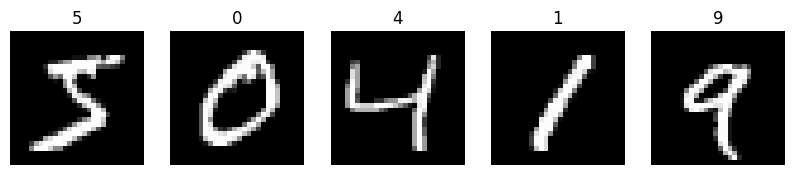

In [5]:
plt.figure(figsize = (10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_train[i], cmap = "gray")
    plt.title(f"{y_train[i]}")
    plt.axis("off")
plt.show()

### NORMALIZATION

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train.shape

(60000, 28, 28)

### RESHAPING

In [8]:
X_train = X_train.reshape(len(X_train), 28, 28, 1)
X_test = X_test.reshape(len(X_test), 28, 28, 1)

### MODEL BUILDING

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

In [10]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = "relu")
])

In [11]:
model.add(
    MaxPooling2D(pool_size = (2, 2))
)

In [12]:
model.add(Flatten())

In [13]:
model.add(Dense(128, activation = "relu"))

In [14]:
model.add(Dense(10, activation = "softmax"))

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping

In [18]:
early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 2,
    restore_best_weights = True
)

In [19]:
history = model.fit(
    X_train,
    y_train,
    epochs = 10,
    batch_size = 32,
    validation_split = 0.2,
    callbacks = [early_stop]
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9486 - loss: 0.1689 - val_accuracy: 0.9793 - val_loss: 0.0728
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9825 - loss: 0.0571 - val_accuracy: 0.9841 - val_loss: 0.0560
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9889 - loss: 0.0357 - val_accuracy: 0.9835 - val_loss: 0.0553
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9924 - loss: 0.0234 - val_accuracy: 0.9812 - val_loss: 0.0637
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9945 - loss: 0.0166 - val_accuracy: 0.9820 - val_loss: 0.0668


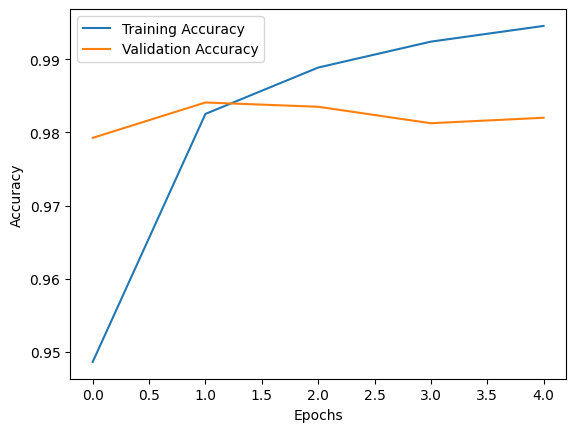

In [20]:
plt.plot(history.history["accuracy"], label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

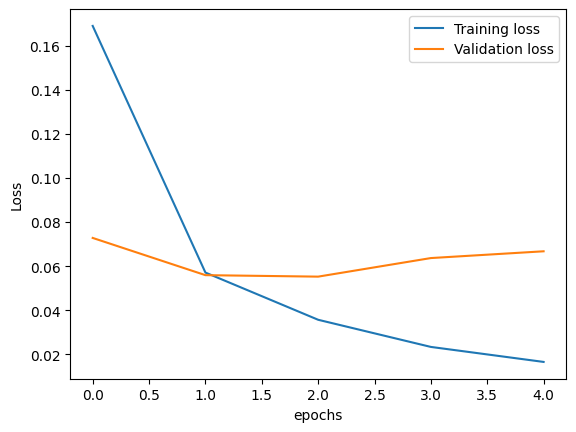

In [21]:
plt.plot(history.history["loss"], label = "Training loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.show()

### TEST PREDICTIONS

In [22]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"test accuracy: {test_accuracy}")
print(f"test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0502
test accuracy: 0.9833999872207642
test loss: 0.05015236511826515


In [23]:
predictions = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [24]:
predicted_labels = np.argmax(predictions, axis = 1)

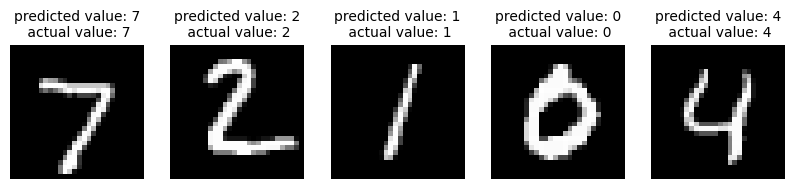

In [25]:
plt.figure(figsize = (10, 4))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i], cmap = "gray")
    plt.title(f"predicted value: {predicted_labels[i]}\n actual value: {y_test[i]}", fontsize = 10)
    plt.axis("off")
plt.show()

### CONFUSION MATRIX

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [27]:
cm = confusion_matrix(y_test, predicted_labels)

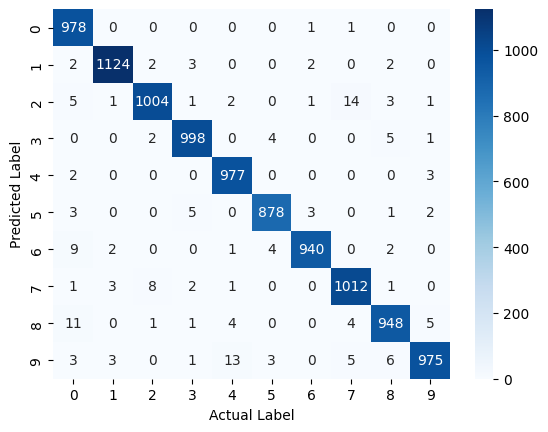

In [28]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = "Blues")
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.show()